In [100]:
#================================================================================
#1️⃣ IMPORTAR LA LIBRERIA DE PANDAS
#================================================================================
import pandas as pd
#================================================================================

In [101]:
#================================================================================
#1️⃣ IMPORTAR LA LIBRERIA DE PANDAS
#================================================================================
import pandas as pd
#================================================================================
#2️⃣ CARGAR LOS ARCHIVOS CSV
#================================================================================
# Usamos pd.read_csv
ventas_df = pd.read_csv("ventas.csv") #df indica dataframe
inventarios_df = pd.read_csv("inventarios.csv")
satisfaccion_df=pd.read_csv("satisfaccion.csv")
# ===============================================================================
# 3️⃣ mostrar las primeras 3 filas
# ===============================================================================
print("===Ventas===")
print(ventas_df.head(),"\n") #head() muestra los 5 primeros registros
print("===Inventarios===")
print(inventarios_df.head(),"\n")
print("===satisfaccion===")
print(satisfaccion_df.head(),"\n")
#===============================================================================
# 4️⃣ Limpiar datos (eliminar filas)
#===============================================================================
ventas_df = ventas_df.dropna()
inventarios_df=inventarios_df.dropna()
satisfaccion_df=satisfaccion_df.dropna()
#===============================================================================
# 5️⃣ Analisis con pandas
#===============================================================================
ventas_df["Ventas_totales"]= ventas_df["Cantidad_Vendida"] * ventas_df["Precio_Unitario"]
print(ventas_df)
ventas_totale=ventas_df.groupby("ID_Tienda")["Ventas_totales"].sum().reset_index()
print("===VENTAS TOTALES POR TIENDA===")
print(ventas_totale)
#===============================================================================
# 6️⃣ Rotacion de inventarios
#===============================================================================
ventas_inventarios = pd.merge(ventas_df,inventarios_df,on=["ID_Tienda","Producto"],how="inner")
#=============================================================================== 
#merge hace comparacion con dos ramas
# on=["ID_tienda","Producto"] ----> clave de union es obligatoria 
#  how="inner" solo conserva las filas que tienen coincidencias en ambas tablas o dataframes
#===============================================================================
print("=======VENTAS POR INVENTARIO=======")
print(ventas_inventarios)
#===============================================================================
# Rotacion de inventarios
#===============================================================================
ventas_inventarios["Rotacion_inventarios"]=ventas_inventarios["Cantidad_Vendida"] / ventas_inventarios["Stock_Disponible"]
print("========PROPORCION DE VENTAS POR INVENTARIOS==========")
print(ventas_inventarios)
#===============================================================================
# depurar inventarios criticos
#===============================================================================
print("===== TIENDAS CON MENOR ROTACION DE INVENTARIOS========")
ventascriticas= ventas_inventarios.query("Rotacion_inventarios <= 0.1")
print(ventascriticas)



===Ventas===
   ID_Tienda    Producto  Cantidad_Vendida  Precio_Unitario Fecha_Venta
0          1  Producto A                20              100  2023-01-05
1          1  Producto B                15              200  2023-01-06
2          2  Producto A                30              100  2023-01-07
3          2  Producto C                25              300  2023-01-08
4          3  Producto A                10              100  2023-01-09 

===Inventarios===
   ID_Tienda    Producto  Stock_Disponible Fecha_Actualización
0          1  Producto A                50          2023-01-05
1          1  Producto B                40          2023-01-06
2          2  Producto A                60          2023-01-07
3          2  Producto C                45          2023-01-08
4          3  Producto A                30          2023-01-09 

===satisfaccion===
   ID_Tienda  Satisfacción_Promedio Fecha_Evaluación
0          1                     85       2023-01-15
1          2                  

In [102]:
##===============================================================================
# ventas con satisfaccion al cliente 
#===============================================================================
ventas_satisfaccion= pd.merge(ventas_df,satisfaccion_df,on = ["ID_Tienda"],how="inner")
print("=======SATISFACCCION POR SATISFACCION============")
print(ventas_satisfaccion)
#depurar ventas con menos del 60% en satisfaccion al cliente
satisfaccioncritica= ventas_satisfaccion.query("Satisfacción_Promedio <= 60")
print("===== TIENDAS CON SATISFACCION MENOR A 60% =======")
print(satisfaccioncritica[["ID_Tienda","Satisfacción_Promedio"]])

=======SATISFACCCION POR SATISFACCION============
   ID_Tienda    Producto  Cantidad_Vendida  Precio_Unitario Fecha_Venta  \
0          1  Producto A                20              100  2023-01-05   
1          1  Producto B                15              200  2023-01-06   
2          2  Producto A                30              100  2023-01-07   
3          2  Producto C                25              300  2023-01-08   
4          3  Producto A                10              100  2023-01-09   
5          3  Producto B                40              200  2023-01-10   
6          4  Producto C                35              300  2023-01-11   
7          4  Producto A                25              100  2023-01-12   
8          5  Producto B                20              200  2023-01-13   
9          5  Producto C                30              300  2023-01-14   

   Ventas_totales  Satisfacción_Promedio Fecha_Evaluación  
0            2000                     85       2023-01-15  
1   

In [103]:
#===============================================================================
# Simular ventas futuras usando array random (propio)
#===============================================================================
import numpy as np
ventas_dfcopy= ventas_df.copy()
ventas_dfcopy["Ventasfuturas"] = np.random.randint(3,10,size=len(ventas_dfcopy)) 
"""
bajo: el número más bajo que puede salir (incluido).

alto: el número más alto que NO se incluye.

size: la cantidad total de números aleatorios que quieres generar.
"""
print("==== VENTAS FUTURAS ====")
print(ventas_dfcopy)

==== VENTAS FUTURAS ====
   ID_Tienda    Producto  Cantidad_Vendida  Precio_Unitario Fecha_Venta  \
0          1  Producto A                20              100  2023-01-05   
1          1  Producto B                15              200  2023-01-06   
2          2  Producto A                30              100  2023-01-07   
3          2  Producto C                25              300  2023-01-08   
4          3  Producto A                10              100  2023-01-09   
5          3  Producto B                40              200  2023-01-10   
6          4  Producto C                35              300  2023-01-11   
7          4  Producto A                25              100  2023-01-12   
8          5  Producto B                20              200  2023-01-13   
9          5  Producto C                30              300  2023-01-14   

   Ventas_totales  Ventasfuturas  
0            2000              3  
1            3000              5  
2            3000              5  
3        

<function matplotlib.pyplot.show(close=None, block=None)>

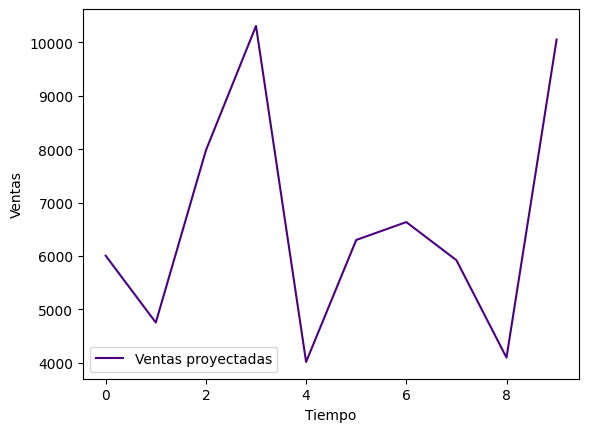

In [110]:
#===============================================================================
# Simular ventas futuras usando array random (propio)
#===============================================================================
import numpy as np
import matplotlib.pyplot as pub
#Generar datos aleatorios para 10 puntos en el tiempo
tiempo=np.arange(10)
ventas_aleatorias=np.random.rand(10)*10000
#Proyectar las ventas con una tendencia lineal
pendiente = 50
interseccion = 1000
ventas_proyectadas = pendiente*tiempo+interseccion+ventas_aleatorias
pub.plot(tiempo,ventas_proyectadas,label="Ventas proyectadas", color = "indigo")
pub.xlabel("Tiempo")
pub.ylabel("Ventas")
pub.legend()

pub.show

In [111]:
#===============================================================================
# calular la mediana y desviacion estandas de las ventas
#===============================================================================
Estadisticas = ventas_totale["Ventas_totales"].describe()

print("====MEDIANA DE LAS VENTAS TOTALES====")
print(f"la mediana de las ventas totales es: {Estadisticas["mean"]}")
print("====DESVIACION ESTANDAR DE LA VENTAS TOTALES=====")
print(f"la desviacion estandar de las ventas totales es:{Estadisticas["std"]}")


====MEDIANA DE LAS VENTAS TOTALES====
la mediana de las ventas totales es: 10100.0
====DESVIACION ESTANDAR DE LA VENTAS TOTALES=====
la desviacion estandar de las ventas totales es:3324.1540277189324


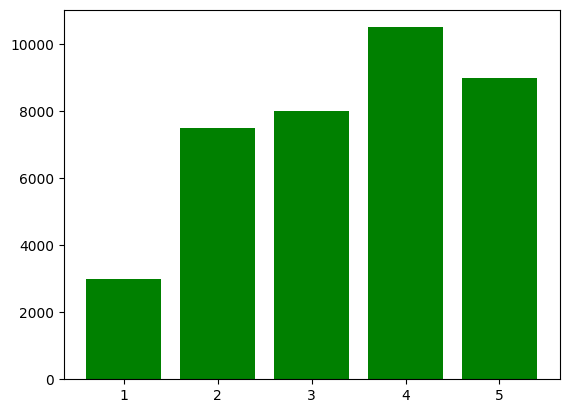

In [112]:
#===============================================================================
# graficar las ventas totales con un histograma
#===============================================================================
import matplotlib.pyplot as pub
ventas = ventas_df["Ventas_totales"]
pub.bar(ventas_df["ID_Tienda"],ventas_df["Ventas_totales"], color="green")
pub.show()